# Spam or Ham Detection - Text Classification

- Key Activities
    - Introduce the Problem. 
        - What is the problem you are trying to solve? What questions are you trying to find answers to?
    
    - Introduce the Data.
        - Where did you find it? What is the data about (Include Link)? What are the features (With additional explanations if not already self-explanatory from the name itself)?
    - Data understanding/Visualization.
        - Use methods to try to further undestand and visualize the data. Make sure to remember your initial problems/questions when completing this step.
        - While exploring. does anythong else stand out to you (Perhaps any surprising insights?)
    - Pre-processing the Data.
        - What pre-processing steps do you follow? Explain why you do each pre-processing step.
    - Modeling
        - What model(s) do you use to try to solve your problem? Why do you choose those model(s)?
        - Brieflt explain each algorithm used (What is it, How does it work, pros/cons, etc.).
    - Evaluation
        - How well does your model(s) perform? What evaluation metrics do you use and why?
    - Storytelling
        - What have you learned? Tell a story around your data (insights gained through modeling). Were you able to answer your initial problems/questions (if so, discuss what)?
    - Impact section
        - Disscuss the possible impact of your project. This can be socially, ethically, ,etc. It cannot be something like "our project has no impact" or "our project has no negative impact". Even the most well-intentioned projects "could" have a negative impact. We will not be checking for "right" or "wrong" answer, but showing your critical thinking.
    - References
        - Include any references.
    

### Importing Packages

In [51]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [52]:
warnings.filterwarnings('ignore')

### Introduce the Problem. 
- What is the problem you are trying to solve? What questions are you trying to find answers to?

- Answer: The problem that I have taken is to classify emails or tweets, determining whether the received message is spam or ham. We aim to solve this issue for users of Gmail, Twitter, etc., identifying whether the received message contains any fraudulent activity within the text.

### Introduce the Data.
- Where did you find it? What is the data about (Include Link)? What are the features (With additional explanations if not already self-explanatory from the name itself)?

- Answer: 
    - I found this dataset from kaggle.com, from the given link (https://www.kaggle.com/code/mfaisalqureshi/email-spam-detection-98-accuracy/input). This data has one feature column and one Label column. 
    - Features column named as: "Message" and Label column named as: "Category". In this features column, we have data in Text form. Maybe this data could have some words that could be considered spam ('free money',' lottery' etc.) we are considering this kind of email as spam email. and remaining emails which will be considered as a Ham email or message. Along with that, we have two categories in the label column, the first one is ham and the second one is spam based on this we will be training our Machine Learning model.
    - Additional Information of dataset, It has 2 columns and both the columns have object (Text) dtype data. Along with that, it has 5572 Instances.
    - N-Unique values that we have for the label column are 2 unique values (spam, ham) and the features column has 5572 unique values as there is text in our column.
    - Dataset has no missing values in any column.
    - Value count for label column, we came to know that for ham instances we have and for spam, we have 747 instances which is considered as imbalanced data that we will tackle in the next few steps.

In [53]:
# Importing Dataset
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Information of Dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


- N-Unique Value in Dataset

In [55]:
df.nunique()

Category       2
Message     5157
dtype: int64

- Checking for Null Values

In [56]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

- Value counts for label column

In [57]:
df[['Category']].value_counts()

Category
ham         4825
spam         747
dtype: int64

### Data understanding/Visualization.
- Use methods to try to further undestand and visualize the data. Make sure to remember your initial problems/questions when completing this step.
- While exploring. does anythong else stand out to you (Perhaps any surprising insights?)

- Answer: After visualizing the categories of label columns (spam and ham). we came to know that we have more number of ham instances and less number of spam instances. which could affect the Machine Learning model. which could misclassified further in production so we will try to balance the data. we will be using some pre-processing methods and we will balance the data in an equal number of spam and ham messages.

Text(0, 0.5, 'Count of each category')

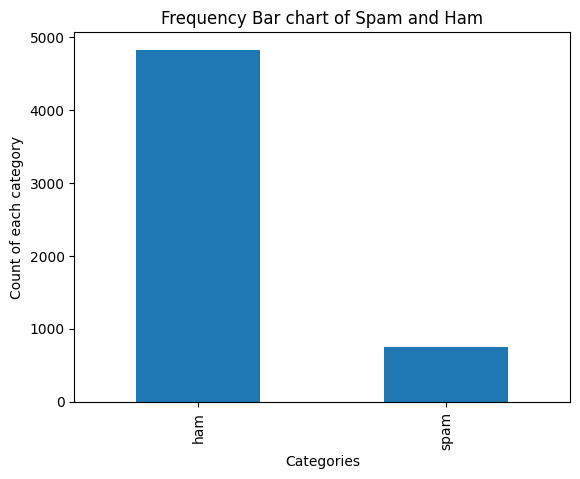

In [58]:
freq_table = df['Category'].value_counts()
freq_table.plot(kind='bar')
plt.title("Frequency Bar chart of Spam and Ham")
plt.xlabel("Categories")
plt.ylabel("Count of each category")

### Pre-processing the Data.
- What pre-processing steps do you follow? Explain why you do each pre-processing step.

- Answer: 
    - First, we are dividing into features and label variables. 
    - Then we clean data and Remove unwanted things like usernames, hashtags, URLs, Extra Spaces, Emojis, etc. The reason for removing all these things is, that we are trying to encode the data so in the process of encoding, we don't want any unwanted things inside our dataset so we have used **re** module which is considered as a **Regular Expression** in Python which handles the data cleaning in our task.
    - Then we are using Tokenization in natural language processing there is a concept of text encoding we are trying to apply that encoding onto our cleaned text data so it will be converted into 0 to 1 format for our words, where the maximum features we are giving 2000 and stop words we are using in the English language.
    - Afterwards, in a Label column we had imbalanced data for our spam and ham classes so we are using **SMOTE** method and resampling the target classes in an equal number, so now we have to have an equal number of spam and ham class instances.
    - Label Encoding, we are having 2 classes in our label column **spam & ham** so we are converting these two classes into numerical data using LabelEncoding() Provided by the Sklean library. After applying the resampled data from the SMOTE we are having spam and ham as a 0 and 1.
    - Now again we are converting these two Feature and Target variables into DataFrame which would be easier to handle in a further process.
    - Train test split, once our data has been converted into Feature and Target Variable in a processed manner now we are converting our data into train test split, where 80% of the data we are keeping for the training of our Machine Learning model, and remaining 20% of the data we are keeping as a testing purpose which is unseen data for our Machine learning model.

- Splitting data into features and label.

In [59]:
df_features = df[['Message']]
df_label = df[['Category']]
print(df_features.shape,df_label.shape)

(5572, 1) (5572, 1)


- Cleaning the data

In [60]:
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove usernames
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters (including emojis)
    return text

df_features['cleaned_text'] = df_features['Message'].apply(clean_text)
df_features = df_features.drop('Message',axis=1)

In [61]:
df_features['cleaned_text'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: cleaned_text, dtype: object

- Text encoding: (TF-IDF Vectorization)

In [62]:
vectorizer = TfidfVectorizer(max_features=2000,stop_words='english')
df_features_vectorized = vectorizer.fit_transform(df_features['cleaned_text']).toarray()

- Handling Imbalanced data

In [63]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_features_vectorized,df_label)
print(len(X_resampled),len(y_resampled))
print(X_resampled.shape,y_resampled.shape)

9650 9650
(9650, 2000) (9650, 1)


In [64]:
print(y_resampled.nunique())
print(y_resampled.value_counts())

Category    2
dtype: int64
Category
ham         4825
spam        4825
dtype: int64


- Label Encoding

In [65]:
label_encoder = LabelEncoder()
y_resampled = label_encoder.fit_transform(y_resampled)

In [66]:
print(y_resampled[:10])

[0 0 1 0 0 1 0 0 1 1]


- Processed features and labels

In [67]:
df_features = pd.DataFrame(X_resampled)
df_label = pd.DataFrame(y_resampled)

- Train Test Split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df_features,df_label,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(7720, 2000) (1930, 2000)
(7720, 1) (1930, 1)


### Modeling
- What model(s) do you use to try to solve your problem? Why do you choose those model(s)?
- Briefly explain each algorithm used (What is it, How does it work, pros/cons, etc.).

- Answer:
    - Models that we are using for our classification task, 1. Decision Tree Classifier, 2.KNN Classifier and 3. Logistic Regression.
    - Why I am selecting these models because, 
        - Decision Tree splitting the classes into N number of nodes, which can work more precisely that is the reason for Selecting Decision Tree Classifier.
        - KNN Classifier, works on instance-based learning where it will be assigning the class to our new instances by checking the nearest instances class.
        - Logistic Regression, is one of the most widely used algorithms that calculates the probability of each class belonging to the new instance.

    - Briefly Explanation of Each Algorithm: 
    - Decision Tree Classifier:

        - What is it? Decision tree is a supervised learning algorithm used for classification tasks. It builds a tree-like structure where each internal node represents a "decision" based on a feature, each branch represents the outcome of that decision, and each leaf node represents the class label.
        - How does it work? It works by recursively splitting the dataset into subsets based on the most significant attribute at each node. This splitting process continues until a stopping criterion is met, such as reaching a maximum depth or purity.
        - Pros: Easy to interpret and understand, handles both numerical and categorical data, requires little data preprocessing, and can capture non-linear relationships.
        - Cons: Prone to overfitting, sensitive to noisy data, and can create biased trees if some classes dominate.
    - KNN Classifier (K-Nearest Neighbors):

        - What is it? KNN is a simple and intuitive classification algorithm that works based on similarity measures. It assigns a class label to a data point by a majority vote of its k nearest neighbors.
        - How does it work? When a new data point is to be classified, the algorithm calculates the distance between the point and every other point in the dataset. It then selects the k nearest neighbors based on these distances and assigns the class label by a majority vote.
        - Pros: Simple to understand and implement, no training phase (lazy learning), effective for multi-class classification, and can handle noisy data well.
        - Cons: Computationally expensive, especially for large datasets, sensitive to irrelevant features, and requires a suitable choice of the parameter k.
    - Logistic Regression:

        - What is it? Despite its name, logistic regression is a classification algorithm used for binary classification tasks. It models the probability of a binary outcome (such as class labels 0 and 1) based on one or more predictor variables.
        - How does it work? Logistic regression applies the logistic function to a linear combination of the input features. The logistic function (also known as the sigmoid function) maps any real-valued number into a value between 0 and 1, which can be interpreted as a probability. The model then predicts the class label based on this probability.
        - Pros: Simple and efficient, interpretable results (coefficients represent the impact of features), works well with linearly separable data, and less prone to overfitting compared to more complex models.
        - Cons: Assumes a linear relationship between the features and the log-odds of the response, not suitable for non-linear relationships without transformations, and can be sensitive to outliers.

In [69]:
tree_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()
log_clf = LogisticRegression()

### Evaluation
How well does your model(s) perform? What evaluation metrics do you use and why?

- Answer:
    - Cross Validation Score, we give our training data X_train and y_train then we perform validation on each small set of data 3 times, also considered as a Folds, and check for the accuracy on each validation fold, where at 1st fold of a small set of data will be taken for training and another will be taken for training, on a 2nd fold different validation fold will be taken random and remaining for the training and so on till the 3 folds. (We could increase the number of cvs to get a more precise accuracy estimate but due to the large amount of data we are performing our cv on only 3 validation folds).
    - Confusion Matrix on a Train and Test set, Here we are checking for the training and testing confusion matrix where, we have actual values and predicted values, and we are checking diagonal if the diagonal boxes mean the 1st and 4th box of the confusion matrix has a huge number of values it means our model is working properly, which is also considered as a TP, TN, and Non-diagonal boxes will be considered as an FP, FN. Majorly we are using a Confusion Matrix to analyze our model precisely. Also, we are checking for Precision on how well our model is performing, and also considering Recall on how much data our model is working properly.
    - Model fitting on a Test set: After looking into the confusion matrix we can see the Decision Tree is working more accurately on this data, along with that it is also not overfitting our data, because the accuracy of the Training set and Testing set is almost the same. So we are selecting a decision tree as our final model fitting our testing data and checking for the classification report.
    - Classification Report: It gives us the report with the accuracy score, Precision, and Recall for each class, and some other information is also given inside it.

- Cross Validation Score

In [70]:
for clf in (tree_clf,knn_clf,log_clf):
    clf_score = cross_val_score(clf,X_train,y_train,cv=3,scoring='accuracy')
    print(clf.__class__.__name__,clf_score.mean())

DecisionTreeClassifier 0.9677461129074033
KNeighborsClassifier 0.7681340697275404
LogisticRegression 0.9536279816108809


- Confusion Matrix - Training Set

DecisionTreeClassifier
Accuracy Score: 0.9992227979274612
Precision Score: 1.0
Recall Score: 0.9984555984555985
F1 Score: 0.9992272024729522


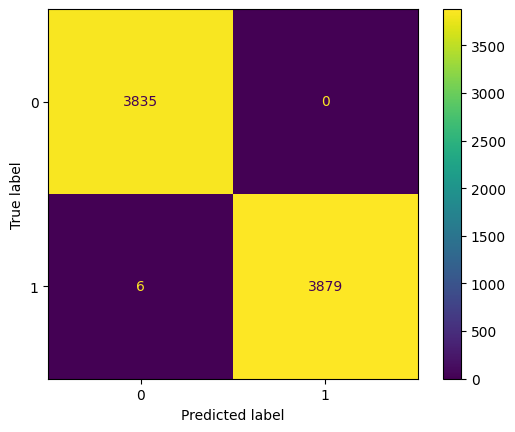

KNeighborsClassifier
Accuracy Score: 0.786139896373057
Precision Score: 0.704954128440367
Recall Score: 0.9889317889317889
F1 Score: 0.823138725227638


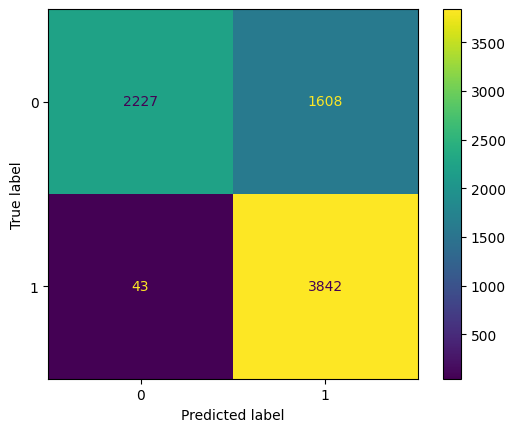

LogisticRegression
Accuracy Score: 0.9625647668393782
Precision Score: 0.9891186071817193
Recall Score: 0.9359073359073359
F1 Score: 0.9617775426530882


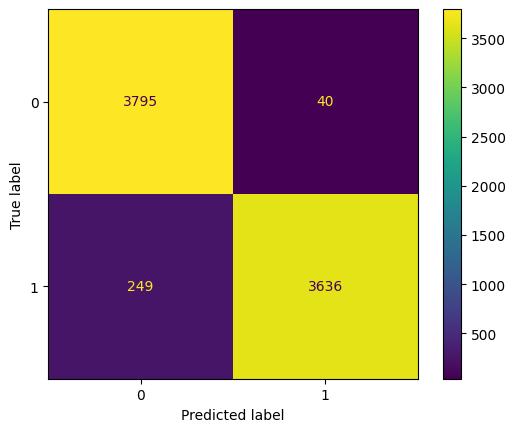

In [71]:
for clf in (tree_clf,knn_clf,log_clf):
    clf.fit(X_train,y_train)
    clf_pred = clf.predict(X_train)
    print(clf.__class__.__name__)
    print("Accuracy Score:",accuracy_score(y_train,clf_pred))
    print('Precision Score:',precision_score(y_train,clf_pred))
    print("Recall Score:",recall_score(y_train,clf_pred))
    print('F1 Score:',f1_score(y_train,clf_pred))
    confusion_mat = confusion_matrix(y_train,clf_pred)
    ConfusionMatrixDisplay(confusion_mat).plot()
    plt.show()
    

- Confusion Matrix - Testing Set

DecisionTreeClassifier
Accuracy Score: 0.9709844559585492
Precision Score: 0.9652631578947368
Recall Score: 0.975531914893617
F1 Score: 0.9703703703703703


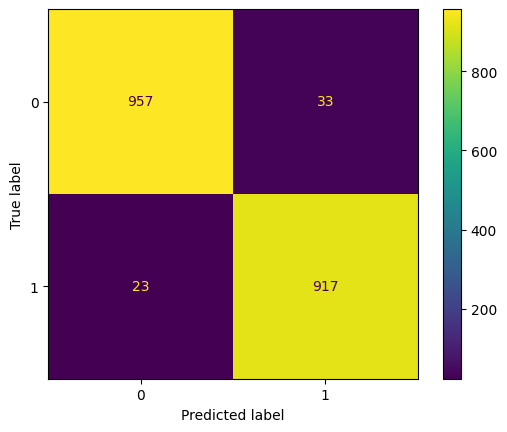

KNeighborsClassifier
Accuracy Score: 0.738860103626943
Precision Score: 0.6548295454545454
Recall Score: 0.9808510638297873
F1 Score: 0.7853492333901193


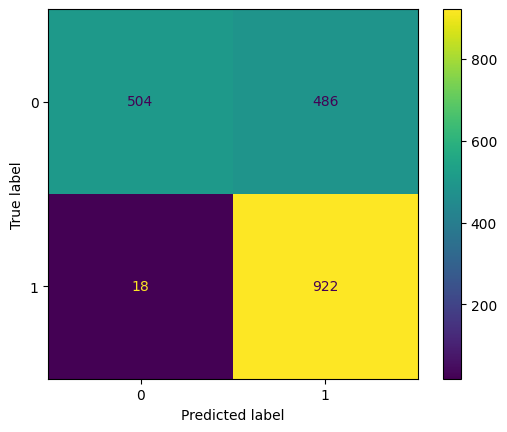

LogisticRegression
Accuracy Score: 0.9590673575129534
Precision Score: 0.9864406779661017
Recall Score: 0.9287234042553192
F1 Score: 0.9567123287671233


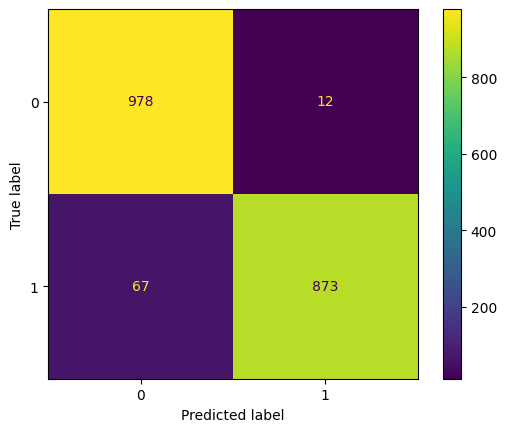

In [72]:
for clf in (tree_clf,knn_clf,log_clf):
    clf.fit(X_train,y_train)
    clf_pred = clf.predict(X_test)
    print(clf.__class__.__name__)
    print("Accuracy Score:",accuracy_score(y_test,clf_pred))
    print('Precision Score:',precision_score(y_test,clf_pred))
    print("Recall Score:",recall_score(y_test,clf_pred))
    print('F1 Score:',f1_score(y_test,clf_pred))
    confusion_mat = confusion_matrix(y_test,clf_pred)
    ConfusionMatrixDisplay(confusion_mat).plot()
    plt.show()
    

- Model Fitting on a Decision Tree Classifier

In [73]:
tree_clf.fit(X_train,y_train)
tree_pred = tree_clf.predict(X_test)
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       990
           1       0.97      0.97      0.97       940

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930



### Storytelling
- What have you learned? Tell a story around your data (insights gained through modeling). Were you able to answer your initial problems/questions (if so, discuss what)?

- Answer: Through this data I have learned, how to read the data using Python and how to check the Dtypes and information related to the dataset, along with that, I came to know about checking the null values inside any data, and with that, I have learned to see the N unique values presented inside the labels, and I understood how the frequency table could give us the bar plot to see the number of instances presented for each class of label column. Then I understood some pre-processing steps like handling imbalanced data and cleaning the data using regular expressions along with that I have understood how we can encode our text format data. and prepare the dataset for final machine learning model fitting. Then I went through the model building where I explored 3 machine learning models, Decision Tree, KNN Classifier, and Logistic regression, which I evaluated on a Cross-validation Score along with Confusion Matrix and Precision, Recall, and F1 Scoring which gives the best evaluation for our Machine learning model. I have evaluated the models of the Training set and Testing set to check the accuracy which will help understand whether our machine learning model is overfitting or underfitting in our case decision tree was working perfectly, it wasn't overfitting or underfitting. Then I fitted my final model on a test set using a Decision Tree Classifier and was working perfectly the Classification Report has given where more precise information related to the Final model fittin on a Decision Tree Classifier. In the end, we wished to classify the spam and ham emails inside our dataset and we were able to solve the problem using Decision Tree Classifier and we solved the problem. We could send this model to production and we could build this model on the streamlit portal to make this service available for everyone in the world in the form of web pages.

### Impact section
- Disscuss the possible impact of your project. This can be socially, ethically, ,etc. It cannot be something like "our project has no impact" or "our project has no negative impact". Even the most well-intentioned projects "could" have a negative impact. We will not be checking for "right" or "wrong" answer, but showing your critical thinking.

- Answer: Our project could impact online services that work on a chat-based system or one Message based system, consider Messaging applications, Email services, Tweet Services, etc. Which may be helpful to classify the Spam messages and spam messages to protect the users from scammers. This could have a good impact on our users, The Bad impact we could consider is the updation of data, we need to make this system live, where we need to apply online machine learning where we need to update the dataset of this project so that if scammers will come to the user with new tricky words our system has to identify the new words which would be considered as a spam message. So updation of the Dataset is a must if we stop updating our dataset then our system will be outdated in a few months or a few days. Along with that everyone sends messages in their unique way, so if this system classifies the ham message as a spam message just because of writing style of each one is different that could be a possible negative impact we could see through this dataset. These are the possible good and Bad impacts I could see throughout this project, there could be more good and bad impacts we could see through this dataset. 

### References
- Include any references.

Dataset from (Kaggle.com): https://www.kaggle.com/code/mfaisalqureshi/email-spam-detection-98-accuracy/input